## Final Project Submission

Please fill out:
* Student name: Kelvin Mwangi Kibung'a
* Student pace: Hybrid
* Scheduled project review date/time: 9/26/2024
* Instructor name: MaryAnn Mwikali
* Blog post URL:


# EXPANSION PROCESS FOR THE AIRLINE(BUYING NEW AIRCRAFTS)

1.Business understanding

The aircraft business is a very crucial business especially in terms of safety to passengers. This introduces the airlines to the big task of choosing the best aircrafts for the passengers not only in terms of comfort and luxury but most importantly the safety of the passengers. There is a vast choice of aircrafts in the market.Some which have had a good record safety wise and some which have been questionable in terms of safety due to their history of accidents which lead to loss of life and critical injuries and mechanical failures which potentially put the passengers at risk. It is ALWAYS very important to look into past data of aircrafts and see their records of the above before making a purchase for the safety of the passengers in order to avoid catastrophes through loss of life and tarnishing the company's reputation. 

2.Objectives

The primary objective is to identify the aircraft that has the lowest risk for the business. This is from the  data of accidents and incidents that have happened in the past involving different aircrafts. Also determining whether the aircraft models had anything to do with the accidents.

3.Understanding the context

We shall consider the following key aspects

1.Current safety features in aircrafts and their efficiency.

2.Business goals: Understand the airlines goals and objectives in expansion and purchasing new crafts.
    

4.Data Relevance

Data selection that is relevant to our analysis

Data quality. Check completeness, accuracy, consisistency and reliability of the data.


In [1]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the data and inspecting the first 5 rows
df = pd.read_csv('Aviation_Data.csv')
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


looking into the shape of our data and the formats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

All columns  except one (Investigation.Type) have missing values.

DATA WRANGLING

In [4]:
#Choosing the relevant variables for the survey
#We mostly choose columns that are related to the plane and are a possible safety cocern
relevant_columns = [ 'Investigation.Type',  'Event.Date',
     'Country', 'Latitude', 'Longitude','Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight']
df = df[relevant_columns]
#Set index to Event.Date
df =df.set_index(['Event.Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 1948-10-24 to 2022-12-29
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Country                 88663 non-null  object 
 2   Latitude                34382 non-null  object 
 3   Longitude               34373 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956

Most of the columns still have alot of missing values. We have to drop the columns with alot of missing values and fill the others with appropriate values

In [6]:
#Dropping the columns with too many missing values
columns_to_drop = df[['Latitude','Longitude','Aircraft.Category','Broad.phase.of.flight']]
df = df.drop(columns_to_drop,axis = 1)

Now that we have dropped the columns with alot of missing values,we have to deal with the other columns which have missing values.We shall handle each column differently depending on the data type and the information it contains

In [7]:
#Replace the null values in numerical columns with median and round it off.
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(round(df['Total.Fatal.Injuries'].median()))

In [8]:
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(round(df['Total.Serious.Injuries'].median()))

In [9]:
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(round(df['Total.Minor.Injuries'].median()))

In [10]:
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(round(df['Total.Uninjured'].median()))

In [11]:
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(round(df['Number.of.Engines'].median()))

For the categorical columns we shall replace the null values with 'unknown' to preserve and aknowledge the information about missingness of the data

In [12]:
#Replace with unknown
df = df.fillna('unknown')

In [13]:
#Convert the make to lower case to avoid same rows being recorded as two because of upper naming 
df['Make'] = df['Make'].str.lower()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 1948-10-24 to 2022-12-29
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Country                 90348 non-null  object 
 2   Injury.Severity         90348 non-null  object 
 3   Aircraft.damage         90348 non-null  object 
 4   Make                    90348 non-null  object 
 5   Model                   90348 non-null  object 
 6   Amateur.Built           90348 non-null  object 
 7   Number.of.Engines       90348 non-null  float64
 8   Engine.Type             90348 non-null  object 
 9   Total.Fatal.Injuries    90348 non-null  float64
 10  Total.Serious.Injuries  90348 non-null  float64
 11  Total.Minor.Injuries    90348 non-null  float64
 12  Total.Uninjured         90348 non-null  float64
 13  Weather.Condition       90348 non-null  object 
dtypes: float64(5), object(9)
memo

In [15]:
#Our data now has no missing values
#it has 90347 rows and 16 columns
#The numerical columns are 5 and the object are 11

# Explolatory Data Analysis(EDA)

Here we look into our data, the relationship between the variables,mostly through visualizing our data.

# a.Univariate analysis for our numerical columns

In [16]:
#extract the numerical columns from the dataset and get the general statistics
numerical_columns = df.select_dtypes(include = 'number')
numerical_columns.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,90348.000000,90348.000000,90348.000000,90348.000000,90348.000000
mean,1.134347,0.555640,0.236607,0.304135,4.972551
std,0.429384,5.085584,1.423306,2.067189,26.776928
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


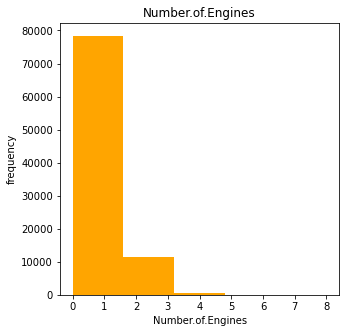

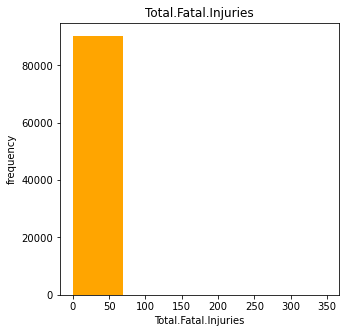

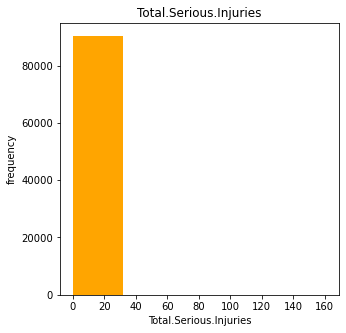

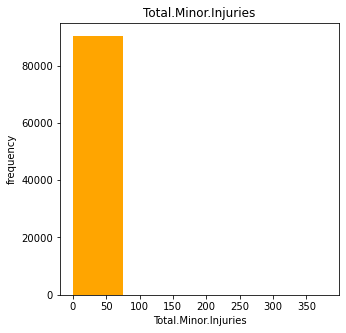

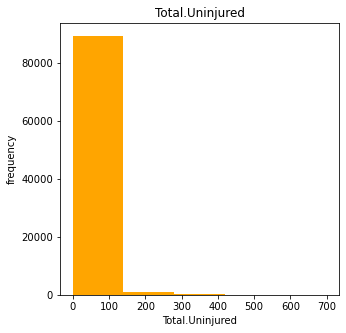

In [17]:
#visualize the numerical columns
#Histogram
#use a for loop to include all columns
for column in numerical_columns:
    #create figure
    plt.figure(figsize =(5,5))
    #plotting
    plt.hist(df[column],bins = 5,color = 'orange')
    #label the axes and write title of the plot
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('frequency')
    #show plot
    plt.show()

The bar plots show the general distribution of data.We see that most of the numerical columns have almost all the values in one category. The other categories have very few inputs.

# b. Bivariate analysis of the numerical columns

Grouping the injury rate and uninjured passengers with respect to the plane Model.This helps us know which model is safer than the other.

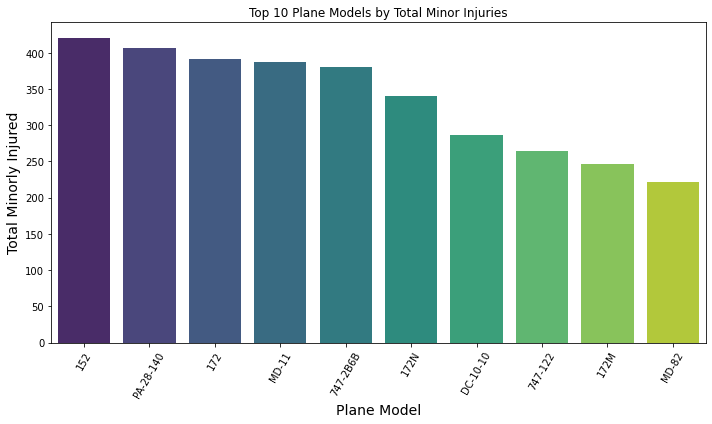

In [18]:
#Showing the top10 minor injuries by plane model
grouped_data = df.groupby('Model')['Total.Minor.Injuries'].sum().reset_index()

# Sort and get the top 10 models by total minor injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Minor.Injuries', ascending=False).head(10)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Model', y='Total.Minor.Injuries', palette='viridis')

# Add titles and labels
plt.title('Top 10 Plane Models by Total Minor Injuries', fontsize=12)
plt.xlabel('Plane Model',fontsize = 14)
plt.ylabel('Total Minorly Injured', fontsize=14)
plt.xticks(rotation=60)

plt.tight_layout()

# Show the plot
plt.show()

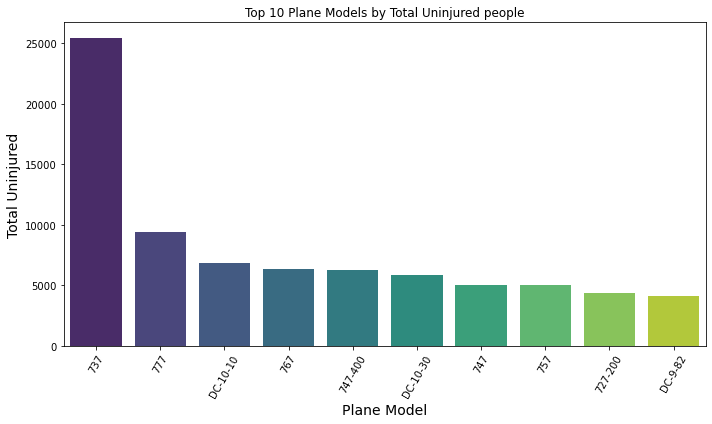

In [19]:
#Showing the top10 Uninjured by plane model
grouped_data = df.groupby('Model')['Total.Uninjured'].sum().reset_index()

# Sort and get the top 10 models by total uninjured
top_minor_injuries = grouped_data.sort_values(by='Total.Uninjured', ascending=False).head(10)

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Model', y='Total.Uninjured', palette='viridis')

# Add titles and labels
plt.title('Top 10 Plane Models by Total Uninjured people', fontsize=12)
plt.xlabel('Plane Model',fontsize = 14)
plt.ylabel('Total Uninjured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

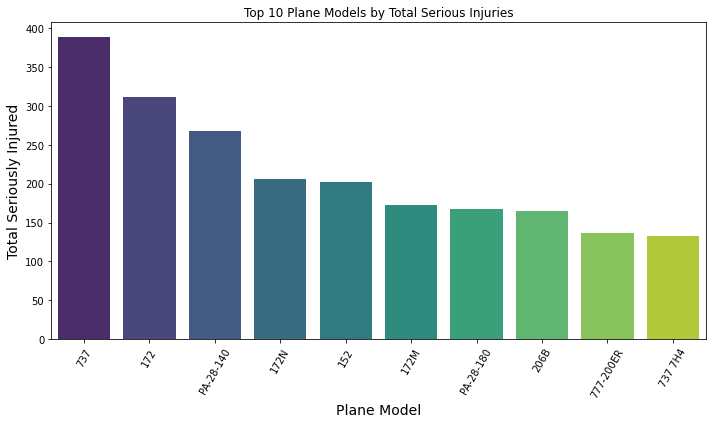

In [20]:
#Showing the top10 Serious injuries by plane model
grouped_data = df.groupby('Model')['Total.Serious.Injuries'].sum().reset_index()

# Sort and get the top 10 models by total Serious injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Serious.Injuries', ascending = False).head(10)
#plotting
plt.figure(figsize = (10,6))
sns.barplot(data=top_minor_injuries, x='Model', y='Total.Serious.Injuries', palette='viridis')

#Add titles and labels
plt.title('Top 10 Plane Models by Total Serious Injuries', fontsize=12)
plt.xlabel('Plane Model',fontsize = 14)
plt.ylabel('Total Seriously Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

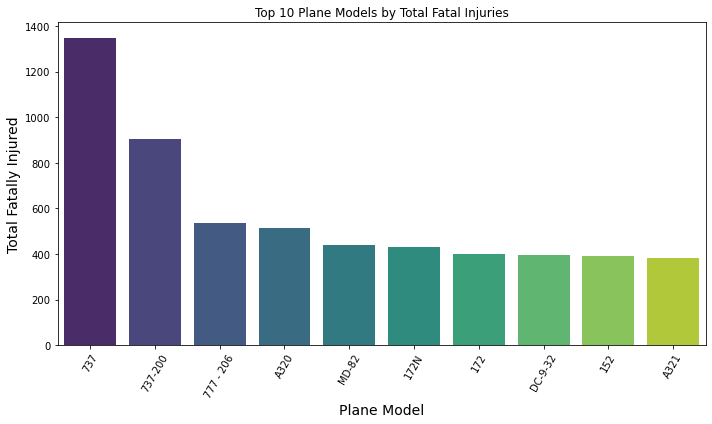

In [21]:
grouped_data = df.groupby('Model')['Total.Fatal.Injuries'].sum().reset_index()

# Sort and get the top 10 models by total Fatal injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Fatal.Injuries', ascending = False).head(10)
#plotting
plt.figure(figsize = (10,6))
sns.barplot(data=top_minor_injuries, x='Model', y='Total.Fatal.Injuries', palette='viridis')

#Add titles and labels
plt.title('Top 10 Plane Models by Total Fatal Injuries', fontsize=12)
plt.xlabel('Plane Model',fontsize = 14)
plt.ylabel('Total Fatally Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

From our plots above(Based on the 10 values of the data) :

1.The model 152 has the most minor injuries and MD 52 has the least minor injuires.

2.The model 737 has the most uninjured passengers while the DC-9-82 has the least uninjured
passengers.

3.The model 737 has the most seriously injured passengers while the 737 7H4 model has the least number of seriously injuries.

4 The model 737 has the most fatal Injuries while A321 has the least fatal accidents.


So far from our visualizations we can assume that the 737 has quite a poor record in injuries as it has the most fatal injuries as well as the most Serious injuries which is not quite music to the ears.


# c. Looking at the rate of accidents injuries with relation to the craft Make

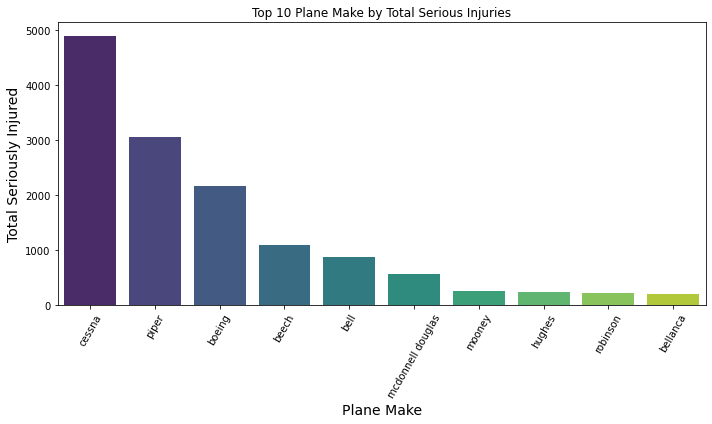

In [22]:
#Showing the top10 Serious injuries by plane make
grouped_data = df.groupby('Make')['Total.Serious.Injuries'].sum().reset_index()

# Sort and get the top 10 make by total Serious injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Serious.Injuries', ascending = False).head(10)
#plotting
plt.figure(figsize = (10,6))
sns.barplot(data=top_minor_injuries, x='Make', y='Total.Serious.Injuries', palette='viridis')

#Add titles and labels
plt.title('Top 10 Plane Make by Total Serious Injuries', fontsize=12)
plt.xlabel('Plane Make',fontsize = 14)
plt.ylabel('Total Seriously Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

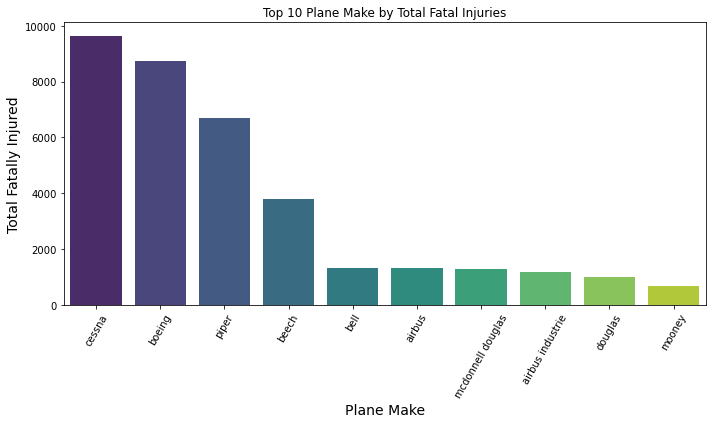

In [23]:
grouped_data = df.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()

# Sort and get the top 10 make by total Fatal injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Fatal.Injuries', ascending = False).head(10)
#plotting
plt.figure(figsize = (10,6))
sns.barplot(data=top_minor_injuries, x='Make', y='Total.Fatal.Injuries', palette='viridis')

#Add titles and labels
plt.title('Top 10 Plane Make by Total Fatal Injuries', fontsize=12)
plt.xlabel('Plane Make',fontsize = 14)
plt.ylabel('Total Fatally Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

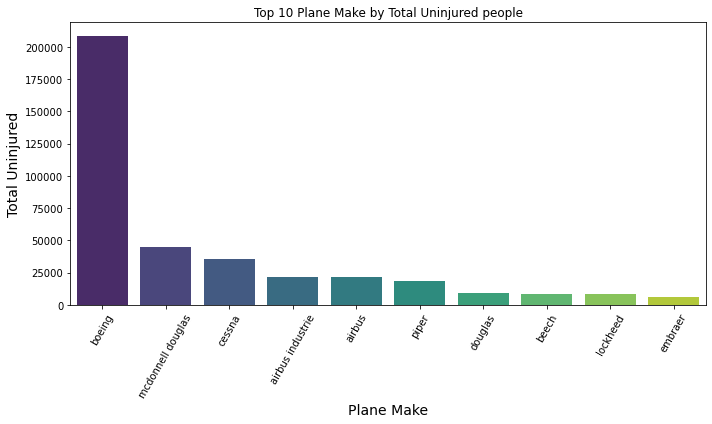

In [24]:
#Showing the top10 Uninjured by plane make
grouped_data = df.groupby('Make')['Total.Uninjured'].sum().reset_index()

# Sort and get the top 10 make by total uninjured
top_minor_injuries = grouped_data.sort_values(by='Total.Uninjured', ascending=False).head(10)

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Make', y='Total.Uninjured', palette='viridis')

# Add titles and labels
plt.title('Top 10 Plane Make by Total Uninjured people', fontsize=12)
plt.xlabel('Plane Make',fontsize = 14)
plt.ylabel('Total Uninjured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

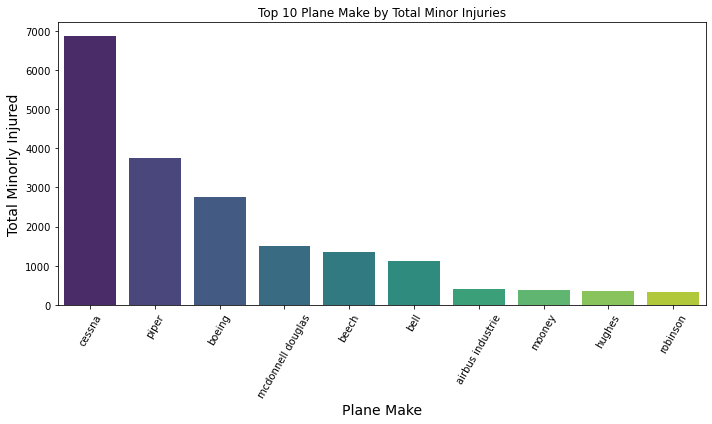

In [25]:
#Showing the top10 minor injuries by plane model
grouped_data = df.groupby('Make')['Total.Minor.Injuries'].sum().reset_index()

# Sort and get the top 10 make by total minor injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Minor.Injuries', ascending=False).head(10)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Make', y='Total.Minor.Injuries', palette='viridis')

# Add titles and labels
plt.title('Top 10 Plane Make by Total Minor Injuries', fontsize=12)
plt.xlabel('Plane Make',fontsize = 14)
plt.ylabel('Total Minorly Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
# Show the plot
plt.show()

Once again from above visualisations(Based on top 10 values of the specified data)

1.Cesna has the worst records from fatal injuries to Serious injuries and also the minor injuries.

2.Boeing seems to be the best in terms of safety as it leads the list of the most uninjured people.

In [26]:
categorical_columns = df[['Investigation.Type', 'Country','Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Weather.Condition']]

Counts for Investigation.Type:
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
Name: Investigation.Type, dtype: int64



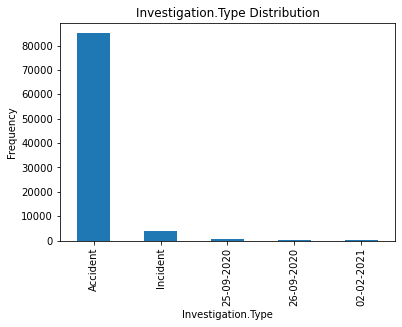

Counts for Country:
United States    82248
unknown           1685
Brazil             374
Canada             359
Mexico             358
Name: Country, dtype: int64



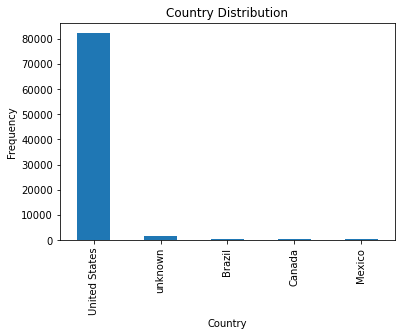

Counts for Injury.Severity:
Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
unknown       2459
Name: Injury.Severity, dtype: int64



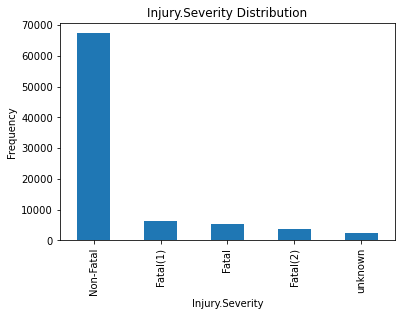

Counts for Aircraft.damage:
Substantial    64148
Destroyed      18623
unknown         4653
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64



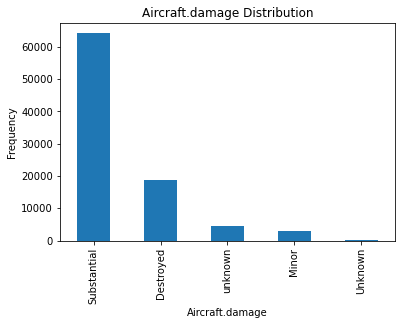

Counts for Make:
cessna    27149
piper     14870
beech      5372
boeing     2745
bell       2722
Name: Make, dtype: int64



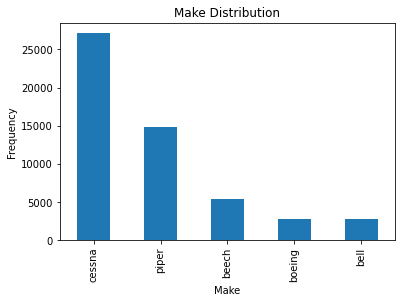

Counts for Model:
152          2367
172          1756
unknown      1552
172N         1164
PA-28-140     932
Name: Model, dtype: int64



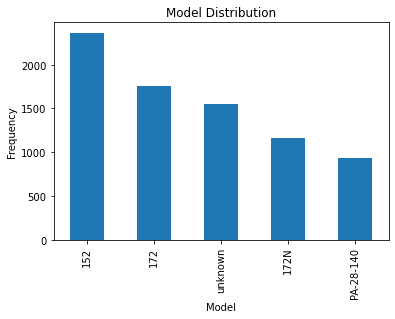

Counts for Amateur.Built:
No         80312
Yes         8475
unknown     1561
Name: Amateur.Built, dtype: int64



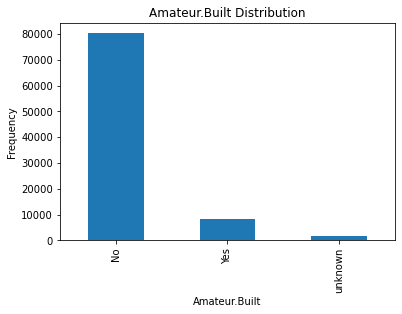

Counts for Engine.Type:
Reciprocating    69530
unknown           8536
Turbo Shaft       3609
Turbo Prop        3391
Turbo Fan         2481
Name: Engine.Type, dtype: int64



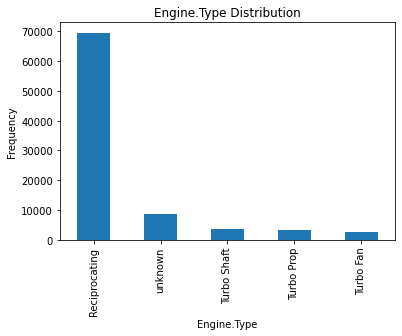

Counts for Weather.Condition:
VMC        77303
IMC         5976
unknown     5951
UNK          856
Unk          262
Name: Weather.Condition, dtype: int64



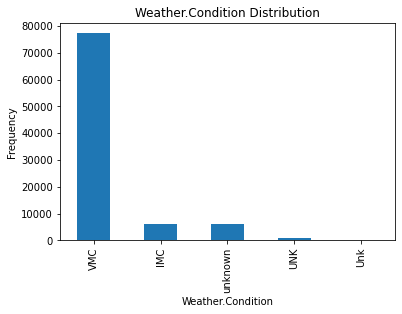

In [27]:
#Getting the general insights of our categrical variables using bar graphs for greater understanding
#use a for loop to include all categorical columns
for column in categorical_columns:
    counts = df[column].value_counts().head()
    print(f"Counts for {column}:")
    print(counts)
    print()

    # Bar plot for each categorical column
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    #show plot
    plt.show()
    
    

From our above plots we can conclude that:

1.Most of the injuries are non-fatal.

2.Most of the damage on planes is substantial.

3.Most planes in the survey are of the make Cessna.

4.Majority are model 152.

5.Most of the planes are not of amateur built.

6.Most planes have a reciprocating Engine type.

7.Most accidents happened when the weather was VMC.



# d. Looking at the Engine types and relationship with all injury records

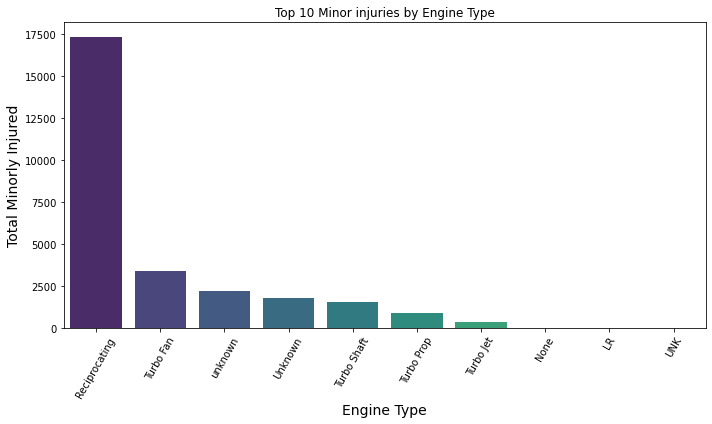

In [28]:
#Looking at the relationship between enginetype and the least injured people 
grouped_data = df.groupby('Engine.Type')['Total.Minor.Injuries'].sum().reset_index()

# Sort and get the top 10 models by total minor injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Minor.Injuries', ascending=False).head(10)

# Step 4: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Engine.Type', y='Total.Minor.Injuries', palette='viridis')

# Add titles and labels
plt.title('Top 10 Minor injuries by Engine Type', fontsize=12)
plt.xlabel('Engine Type',fontsize = 14)
plt.ylabel('Total Minorly Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
# Show the plot
plt.show()

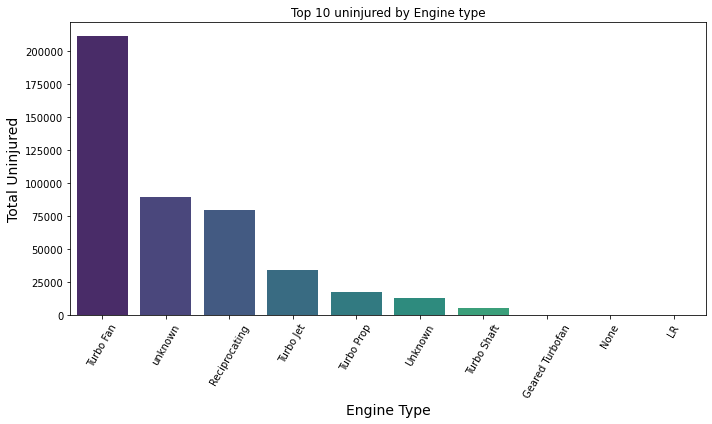

In [29]:
#Showing the top10 Uninjured by Engine Type
grouped_data = df.groupby('Engine.Type')['Total.Uninjured'].sum().reset_index()

# Sort and get the top 10 models by total uninjured
top_minor_injuries = grouped_data.sort_values(by='Total.Uninjured', ascending=False).head(10)

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Engine.Type', y='Total.Uninjured', palette='viridis')

# Add titles and labels
plt.title('Top 10 uninjured by Engine type', fontsize=12)
plt.xlabel('Engine Type',fontsize = 14)
plt.ylabel('Total Uninjured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()
#show plot
plt.show()

The planes with Turbo fan and Reciprocating Engines have the most number of uninjured people  and least injured people respectively. The engine type is definitely something that should be considered when buying an aircraft. 

# e. Number of engines vs injury records

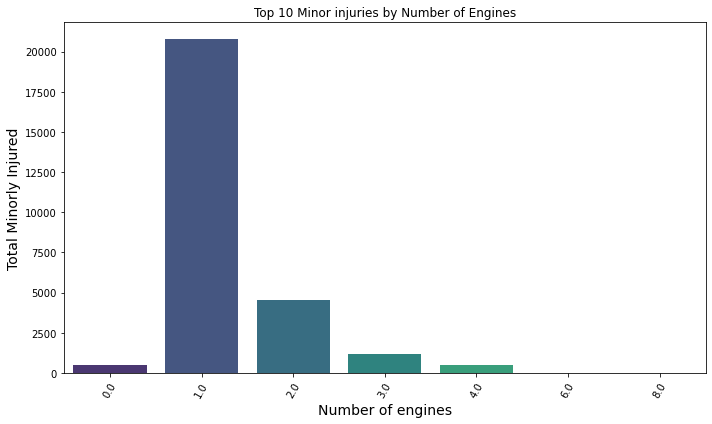

In [30]:
#Looking at the relationship between Number of Engines and the least injured people 
grouped_data = df.groupby('Number.of.Engines')['Total.Minor.Injuries'].sum().reset_index()

# Sort and get the Number of Engines by total minor injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Minor.Injuries', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Number.of.Engines', y='Total.Minor.Injuries', palette='viridis')

# Add titles and labels
plt.title('Top 10 Minor injuries by Number of Engines', fontsize=12)
plt.xlabel('Number of engines',fontsize = 14)
plt.ylabel('Total Minorly Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()

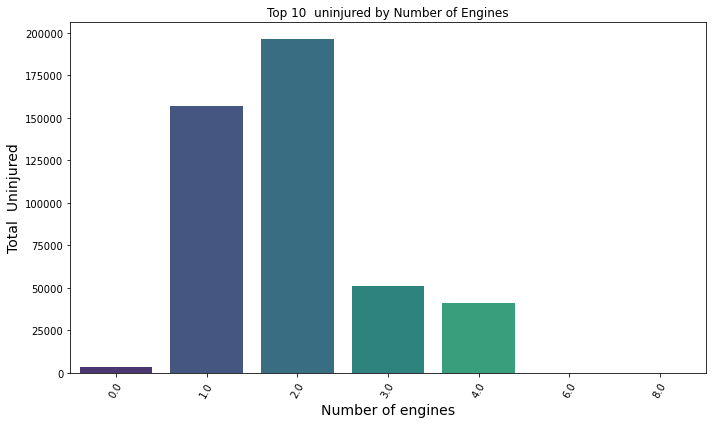

In [31]:
#Looking at the relationship between Number of Engines and the least injured people 
grouped_data = df.groupby('Number.of.Engines')['Total.Uninjured'].sum().reset_index()

# Sort and get the Number of Engines by total minor injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Uninjured', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Number.of.Engines', y='Total.Uninjured', palette='viridis')

# Add titles and labels
plt.title('Top 10  uninjured by Number of Engines', fontsize=12)
plt.xlabel('Number of engines',fontsize = 14)
plt.ylabel('Total  Uninjured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()

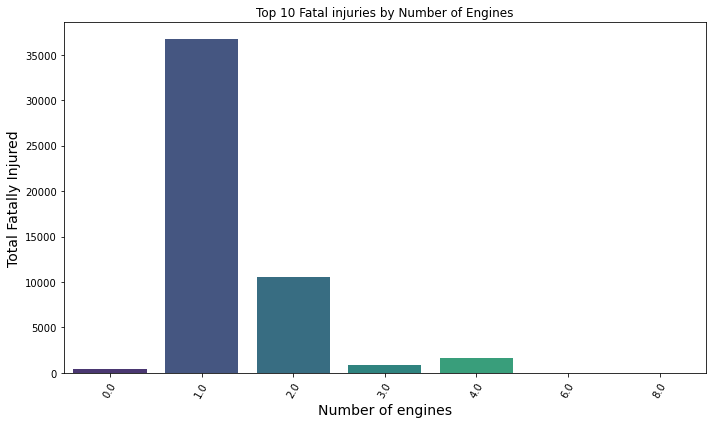

In [32]:
#Looking at the relationship between Number of Engines and the fatally injured people 
grouped_data = df.groupby('Number.of.Engines')['Total.Fatal.Injuries'].sum().reset_index()

# Sort and get the Number of Engines by total fatal injuries
top_minor_injuries = grouped_data.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_minor_injuries, x='Number.of.Engines', y='Total.Fatal.Injuries', palette='viridis')

# Add titles and labels
plt.title('Top 10 Fatal injuries by Number of Engines', fontsize=12)
plt.xlabel('Number of engines',fontsize = 14)
plt.ylabel('Total Fatally Injured', fontsize=14)
plt.xticks(rotation=60)
plt.tight_layout()

# Show the plot
plt.show()

The aircrafts with one engine generally seem to have been involved in most of the accidents that happened.Those with more engines do not cause much accidents to happen.

# Checking for correlation between our four injury variables

In [33]:
columns_correlation = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured']]

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Total.Fatal.Injuries'),
  Text(0, 1.5, 'Total.Serious.Injuries'),
  Text(0, 2.5, 'Total.Minor.Injuries'),
  Text(0, 3.5, 'Total.Uninjured')])

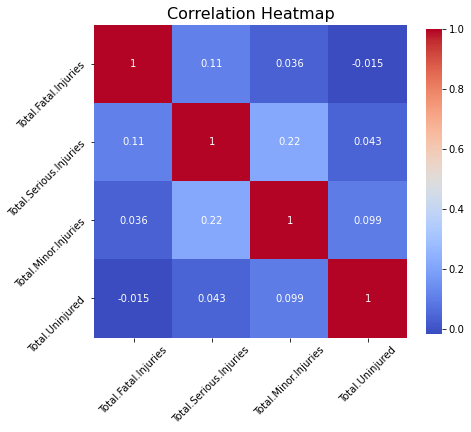

In [34]:
correlation = columns_correlation.corr()

#Set up the matplotlib figure
plt.figure(figsize=(7, 7))

#Create the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

#Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

The heat map indicates a weak correlation between injuries and fatalities, suggesting that individuals who are injured are not necessarily those who end up as fatalities. However, it's important to consider other factors that could influence this relationship

# Conclusions.

Although the hope is that we get a plane that never gets involved in an accident,we are not yet there. Nevertheless we can always determine the craft that always has the best chances of survival incase an accident happens.

Based on the Explolatory data analysis(EDA) conducted above, we can draw the following conclusions:

1.The plane "Model" plays a very big role in survival and minor injuries of the passengers. From our plots above it is evident that although the Model 737 leads with most fatal and serious injuries which is very devastating.On the other hand it also leads with most uninjured people and that is a positive insight.

2.The plane Make is also a very crucial in determining the survival rate and injury state of those on board. The make "cessna" has a very poor record in injury rate.It leads in all the injury records with most casualties. It has the most seriously injured,fatal injuries as well as the minor injuries. That is quite alarming for the model.

On the other hand Boeing has the most uninjured people so it is correct to say that it is the safest plane make above all others involved in this analysis.

3.On the engine make,it is seen that the planes with a turbo fan engine type leads with the most uninjured people. It is also correct to say the reciprocating engine(Which is used on most aircrafts on the analysis) is relatively safer because it has the most minor injuries. It is something posistive considering it is used in most of the aircrafts.

4.The number of engines is another aspect that cannot be ignored in our analysis.Planes with one engine caused most fatal injuries and minor injuries.The ones with more than one engine caused less and less with crafts having two engines being responsible for the most uninjured people.


# Recommendations

 
Based on our conclusions and observations,I go ahead and make the following recommendations.

1.Model: For the model The airline should consider the 737.Even though it leads on the injuries,it also has an advantage on all others in the uninjured number of people.(The model 737 is also linked to the make boeing which has proven to be the safest considering the Make.It is popularly known as Boeing 737)

2.Make: The Boeing has proved to be the best in Make considering the safety of the passengers.The airline should consider the boeing make for the safety of the passengers.

3.Engine make: The airline should consider a craft that makes use of the turbo fan engine type.This is the engine found in the Boeing 737 plane and has great capabilities of perfomance in high altitudes and great speeds.

4.Number of engines: on the engine number,anything more than one engine is considerably safe. Two seems to be the mostly used and has proved to be very safe.

More than two engines is practical but also very inefficient in terms of fuel given that most crafts that utilize four and more engines are mostly millitary.Two engines would be very okay for the airlines flights.


## Conclusion

Based on this analysis, the Boeing 737 stands out as the safest option. It combines a favorable injury record with robust performance capabilities. Airlines can tailor the aircraft for luxury and commercial needs, ensuring both safety and passenger satisfaction.